<a href="https://colab.research.google.com/github/akgulhandan/MscThesis/blob/main/MyThesis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the data

In [142]:
## Get the dataset to colab

!gdown 1A2O42qIXP0MTit5Cer6EH_51wyey9GfI


Downloading...
From: https://drive.google.com/uc?id=1A2O42qIXP0MTit5Cer6EH_51wyey9GfI
To: /content/credit_risk_dataset.csv
100% 1.80M/1.80M [00:00<00:00, 129MB/s]


# Read Data and Import Libraries

In [143]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

import os


# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'



import warnings
warnings.filterwarnings("ignore")

In [144]:
#Read data
data_original =  pd.read_csv("credit_risk_dataset.csv")
data = pd.read_csv("credit_risk_dataset.csv")


# Print sample
data.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': '#daefdd','color': 'black','border-color': '#8b8c8c'})

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,34,55000,MORTGAGE,4.000000,EDUCATION,C,7000,13.490000,0,0.130000,N,7
1,24,24996,RENT,0.000000,PERSONAL,B,4000,9.450000,0,0.160000,N,3
2,24,52800,RENT,3.000000,HOMEIMPROVEMENT,B,6000,9.910000,0,0.110000,N,4
3,23,45000,RENT,7.000000,VENTURE,D,4000,16.320000,0,0.090000,Y,2
4,37,300000,MORTGAGE,7.000000,EDUCATION,B,25000,11.490000,0,0.080000,N,14
5,42,68000,RENT,3.000000,MEDICAL,B,8500,10.370000,0,0.130000,N,12


In [145]:
data.info() #checks the information of raw data columns for data type, Non-null counts etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Dealing with Duplicates, NaN and Missing Values


In [146]:
data.isnull().sum() # shows the total null values for each column

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [147]:
# Let's count all duplicate rows
duplicate_row_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_row_count}")

Number of duplicate rows: 165


In [148]:
#Let's drop Nan Values and Duplicates:

# Step 1: Drop NaN values from the DataFrame
data = data.dropna()

# Step 2: Drop duplicate rows from the DataFrame
data = data.drop_duplicates()


data.reset_index(inplace = True)  #after cleaning, reseting index is a good strategy.

In [149]:
#check the data after cleaning:

data.info()  ## 28501 non-null values in every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28501 entries, 0 to 28500
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       28501 non-null  int64  
 1   person_age                  28501 non-null  int64  
 2   person_income               28501 non-null  int64  
 3   person_home_ownership       28501 non-null  object 
 4   person_emp_length           28501 non-null  float64
 5   loan_intent                 28501 non-null  object 
 6   loan_grade                  28501 non-null  object 
 7   loan_amnt                   28501 non-null  int64  
 8   loan_int_rate               28501 non-null  float64
 9   loan_status                 28501 non-null  int64  
 10  loan_percent_income         28501 non-null  float64
 11  cb_person_default_on_file   28501 non-null  object 
 12  cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(6), object

In [150]:
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 13
Number of rows: 28501


# Exploratory Data or Data Preprocessing

In [151]:
#let's check the our data's description: (only calculates the numeric columns)
data.describe()

,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,16274.982562,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,9399.163655,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8122.000000,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16228.000000,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,32580.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [152]:
#Lets check the corralation between columns :

data.corr(numeric_only=True)  #shows between the numeric columns.

,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
index,1.000000,0.737122,0.168639,0.188156,0.103053,-0.000423,-0.062756,-0.066674,0.773999
person_age,0.737122,1.000000,0.178987,0.165624,0.054246,0.010170,-0.024091,-0.040782,0.859621
person_income,0.168639,0.178987,1.000000,0.136427,0.264942,-0.001346,-0.140456,-0.251487,0.116622
person_emp_length,0.188156,0.165624,0.136427,1.000000,0.110934,-0.056607,-0.082852,-0.055033,0.146486
loan_amnt,0.103053,0.054246,0.264942,0.110934,1.000000,0.146026,0.114153,0.577708,0.045334
loan_int_rate,-0.000423,0.010170,-0.001346,-0.056607,0.146026,1.000000,0.339995,0.123441,0.014562
loan_status,-0.062756,-0.024091,-0.140456,-0.082852,0.114153,0.339995,1.000000,0.380000,-0.016559
loan_percent_income,-0.066674,-0.040782,-0.251487,-0.055033,0.577708,0.123441,0.380000,1.000000,-0.029690
cb_person_cred_hist_length,0.773999,0.859621,0.116622,0.146486,0.045334,0.014562,-0.016559,-0.029690,1.000000


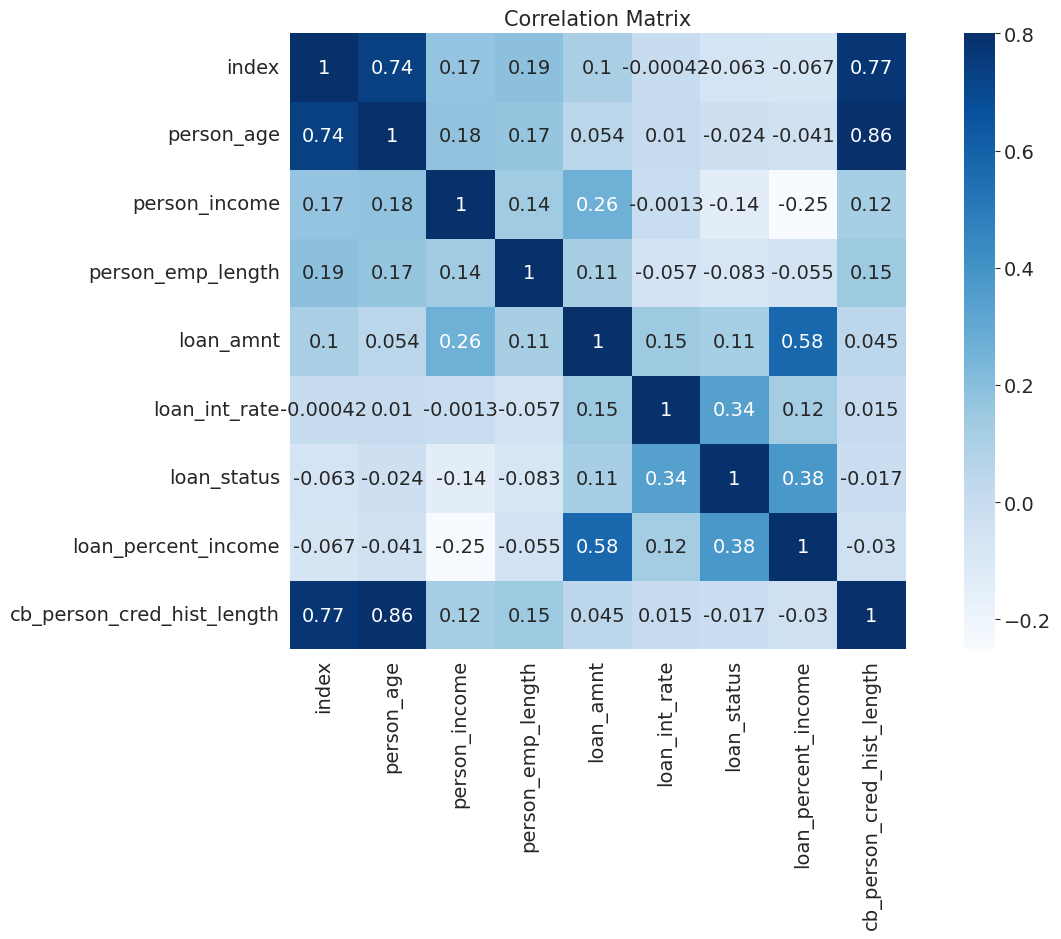

In [153]:
#Let's create corralation matrix to see the relation on graph :

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.corr(numeric_only=True), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Correlation Matrix',fontsize=15);

# Feature Description

person_age: Age of the individual applying for the loan.

person_income: Annual income of the individual.

person_home_ownership: Type of home ownership of the individual.

rent: The individual is currently renting a property.

mortgage: The individual has a mortgage on the property they own.

own: The individual owns their home outright.

other: Other categories of home ownership that may be specific to the dataset.

person_emp_length: Employment length of the individual in years.

loan_intent: The intent behind the loan application.

loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.

A: The borrower has a high creditworthiness, indicating low risk.
B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
C: The borrower's creditworthiness is moderate.
D: The borrower is considered to have higher risk compared to previous grades.
E: The borrower's creditworthiness is lower, indicating a higher risk.
F: The borrower poses a significant credit risk.
G: The borrower's creditworthiness is the lowest, signifying the highest risk.
loan_amnt: The loan amount requested by the individual.

loan_int_rate: The interest rate associated with the loan.

loan_status: Loan status, where 0 indicates non-default and 1 indicates default.

0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
loan_percent_income: The percentage of income represented by the loan amount.

cb_person_default_on_file: Historical default of the individual as per credit bureau records.

Y: The individual has a history of defaults on their credit file.
N: The individual does not have any history of defaults.
cb_preson_cred_hist_length: The length of credit history for the individual.

In [154]:
data['loan_intent'].unique()  #shows the all type of loan intent among all the customers

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [155]:
#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')

age_group([0 ,18, 26, 36, 46, 56, 66])

maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 15579
Age between 27 and 36: Number of people 10392
Age between 37 and 46: Number of people 2051
Age between 47 and 56: Number of people 371
Age between 57 and 66: Number of people 87


In [156]:
#max and min income
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')

income_group([0, 25000, 50000, 75000, 100000,float('inf')])

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 1960
Income between 25001 and 50000: Number of people 10144
Income between 50001 and 75000: Number of people 8501
Income between 75001 and 100000: Number of people 4174
Income between 100001 and inf: Number of people 3722


In [157]:
#min and max loan amount
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')

loan_amount_group([0, 5000, 10000, 15000, float('inf')])

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 8139
Loan Amount between 5001 and 10000: Number of people 10565
Loan Amount between 10001 and 15000: Number of people 5399
Loan Amount between 15001 and inf: Number of people 4398


**Let's get some graphs for features and relations:**

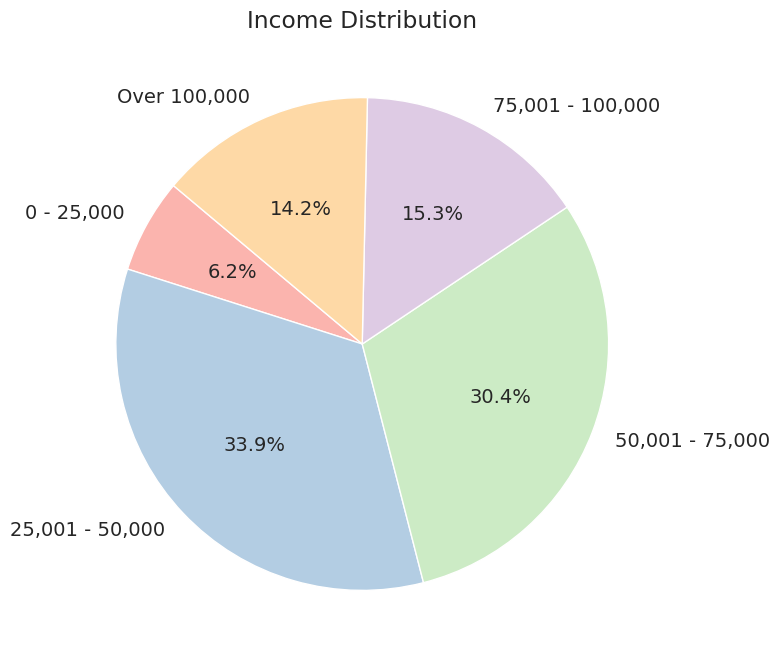

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame containing the 'person_income' column.
# Replace 'data' with the actual name of your DataFrame.

# Define income ranges
income_ranges = [0, 25000, 50000, 75000, 100000, float('inf')]
labels = ['0 - 25,000', '25,001 - 50,000', '50,001 - 75,000', '75,001 - 100,000', 'Over 100,000']

# Calculate the number of people in each income range
counts = []
for i in range(len(income_ranges)-1):
    if i == len(income_ranges) - 2:
        # Include the upper boundary for the last range
        count = data['person_income'].between(income_ranges[i], income_ranges[i+1], inclusive="both").sum()
    else:
        count = data['person_income'].between(income_ranges[i], income_ranges[i+1], inclusive="left").sum()
    counts.append(count)

# Create a pie chart accordingly
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Income Distribution')
plt.show()

Target Distribution Ratio = Default/Non-Default: 0.2773271187200287


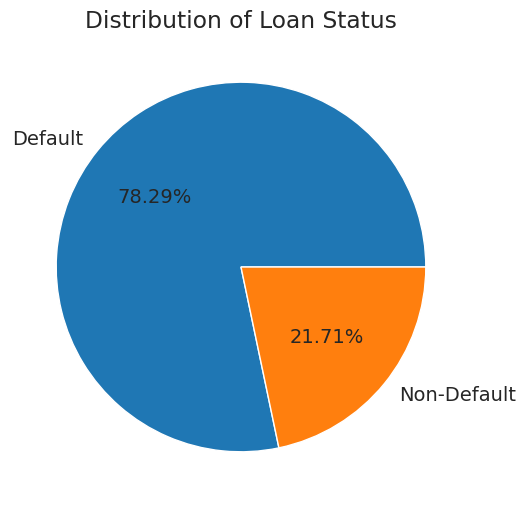

In [159]:
# Since loan_status is our target, we need to understand the ratio between default and non-default
#0: Non-default
#1: Default

status = data['loan_status'].value_counts()
print("Target Distribution Ratio = Default/Non-Default:", status[1]/status[0])

plt.figure(figsize=(8, 6))
plt.pie(status, autopct='%.2f%%', labels=["Default", "Non-Default"])
plt.title('Distribution of Loan Status')
plt.show()

We can see from the figure above, our data is highly imbalanced.

In [160]:
level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

In [161]:
data.loan_status.value_counts()  # this will be the our target. It will help to see if the customer would default or not.

# see the status of borrower(customer)
#loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
#0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
#1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
#still we have dirty data at this point

,count
loan_status,
0,22313
1,6188


In [162]:
import plotly.graph_objs as go
import plotly.offline as py

# Assuming 'data' is your DataFrame and already imported and prepared

trace0 = go.Bar(
    x = data[data["loan_status"]== 1]["loan_grade"].value_counts().index.values,
    y = data[data["loan_status"]== 1]["loan_grade"].value_counts().values,
    name='Loan status = 1',
    marker=dict(color='#88c9a5')  # Setting the color for the first trace
)

# Second plot
trace1 = go.Bar(
    x = data[data["loan_status"]== 0]["loan_grade"].value_counts().index.values,
    y = data[data["loan_status"]== 0]["loan_grade"].value_counts().values,
    name="Loan status = 0",
    marker=dict(color='#81aab5')  # Setting the color for the second trace
)

data_trace = [trace0, trace1]

layout = go.Layout(
    title='Loan Grade Distribution by Status'
)

fig = go.Figure(data=data_trace, layout=layout)

# Plotting the figure inline in a Jupyter notebook; adjust if using a different environment
py.iplot(fig, filename='Loan grade')


In [163]:
trace0 = go.Bar(
    x = data[data["loan_status"]== 1]["loan_intent"].value_counts().index.values,
    y = data[data["loan_status"]== 1]["loan_intent"].value_counts().values,
    name='Loan status = 1'
)

#Second plot
trace1 = go.Bar(
    x = data[data["loan_status"]== 0]["loan_intent"].value_counts().index.values,
    y = data[data["loan_status"]== 0]["loan_intent"].value_counts().values,
    name="Loan status = 0"
)

data_trace = [trace0, trace1]

layout = go.Layout(
    title='Loan Intent'
)


fig = go.Figure(data=data_trace, layout=layout)

py.iplot(fig, filename='Loan intent')

<BarContainer object of 57 artists>

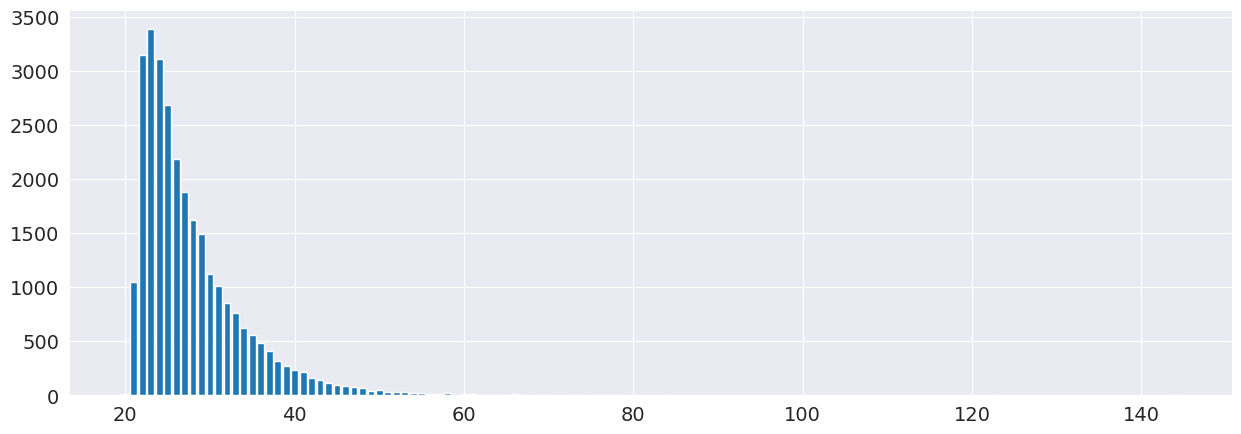

In [164]:
import matplotlib.pyplot as plt
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

In [165]:
(data['person_age'].value_counts().values>90).sum()
# checking the total number of people who is older than 90 and it is 25, so it is safe to drop them when you compare to total number of customers.

25

# Feature Engineering

In [166]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80
data.reset_index(inplace = True)  # reseting index

In [167]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20_25', '26_35', '36_45', '46_55', '56_65'])

In [168]:
data['age_group'].dtype #check the type of new column

CategoricalDtype(categories=['20_25', '26_35', '36_45', '46_55', '56_65'], ordered=True, categories_dtype=object)

In [169]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low_middle', 'middle', 'high_middle', 'high'])

In [170]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very_large'])

In [171]:
data['person_emp_length'].max()

#person_emp_length: Employment length of the individual in years.

123.0

In [172]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [173]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)  ### drop the index column.


In [174]:
data.head()

,level_0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20_25,low,small
1,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20_25,low,medium
2,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20_25,middle,very_large
3,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20_25,middle,very_large
4,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20_25,low,small


In [175]:
data['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,14495
MORTGAGE,11732
OWN,2174
OTHER,93


In [176]:
#Let's create some things that we will use

# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt']

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [177]:
data.columns

Index(['level_0', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [178]:
raw_data = data.copy() #let's create a copy the data we managed to use it later.

In [179]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

In [180]:
data = data.drop(drop_colums, axis=1) #drop the named columns inside the drop_colums

In [181]:
data.head()

,level_0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20_25,low,small,0.104167,0.005000,0.011140
1,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20_25,low,medium,0.572917,0.000182,0.002340
2,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20_25,middle,very_large,0.534351,0.000114,0.000435
3,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20_25,middle,very_large,0.643382,0.000229,0.000408
4,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20_25,low,small,0.252525,0.000800,0.002856


In [182]:
data.isnull().sum()

,0
level_0,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0


In [183]:
data= data.dropna()

# Balancing the Data by oversampling SMOTE


Synthetic Minority Over-sampling Technique

We will apply this tecnique right after splitting the data into train and test

In [184]:
from imblearn.over_sampling import SMOTE

# Training & Test Samples + Label Encoding


In [185]:
X = data.drop(['loan_status'], axis=1)  #to predict our target, we remove it from our main data first.
Y = data['loan_status'] # we assign target (loan_status) to Y value

In [186]:
from sklearn.model_selection import train_test_split  #train_test_split is for creating our training and test samples.
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12) # we split our X and Y datasets from above cell in 80% to 20% percentages

In [187]:
x_train.reset_index(inplace = True) #again reseting indexes because we have splitted above and need to arrange their index.
x_test.reset_index(inplace = True)

In [188]:
print(x_train.shape,x_test.shape) # then we check the splitted data size as a matrix. shape is a method of Numpy library. First value is the number of samples, second value is the number of features

(22771, 19) (5693, 19)


In [189]:
x_train.isnull().sum()
### there are sum null values because we created some new columns like age_group

,0
index,0
level_0,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0


In [190]:
x_train.columns #check the column names of training samples

Index(['index', 'level_0', 'person_age', 'person_income',
       'person_home_ownership', 'person_emp_length', 'loan_intent',
       'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [191]:
from sklearn.preprocessing import OneHotEncoder  ## OneHotEncoder is a preprocessing tool used to convert categorical variables into
#a format that can be provided to machine learning algorithms to improve predictions, specifically by transforming them into one-hot encoded vectors.
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums]) # we use ohe_columns we defined above to convert

OneHotEncoder()

In [192]:
ohe.categories_
##The categories_ attribute of the OneHotEncoder in sklearn contains a list of arrays,
##where each array holds the unique categories for each feature that was one-hot encoded. It essentially shows the distinct values found in each categorical feature after fitting the encoder.

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high_middle', 'low', 'low_middle', 'middle'], dtype=object),
 array(['20_25', '26_35', '36_45', '46_55', '56_65'], dtype=object),
 array(['large', 'medium', 'small', 'very_large'], dtype=object)]

In [193]:
merge_ohe_col = np.concatenate((ohe.categories_[0],
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5],
                ohe.categories_[6],))

In [194]:
merge_ohe_col ### made it into one big array of categories

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'high', 'high_middle', 'low',
       'low_middle', 'middle', '20_25', '26_35', '36_45', '46_55',
       '56_65', 'large', 'medium', 'small', 'very_large'], dtype=object)

In [195]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)  # assign training samples to categories from merge_ohe_col
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col) # assign testing samples to categories from merge_ohe_col

In [196]:
X_new = pd.concat([ohe_data, x_train], axis=1) #create a new X_new by concatenating objects along a particular axis. The axis=1: specifies that the concatenation should be done column-wise
X_new = X_new.drop(ohe_colums, axis=1)

In [197]:
X_new_test = pd.concat([ohe_data2, x_test], axis=1) #create a new X_train by concatenating objects
X_new_test = X_new_test.drop(ohe_colums, axis=1)

In [198]:
print(X_new.head())
X_new.shape

     N    Y    A    B    C    D    E    F    G  MORTGAGE  ...  person_age  \
0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0       0.0  ...          26   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0       1.0  ...          31   
2  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0       0.0  ...          51   
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0       0.0  ...          21   
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0       1.0  ...          21   

   person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          39000                1.0      15000          16.07   
1          31323                6.0       2500          13.22   
2          37200                4.0       3000          10.62   
3          20004                2.0       3000          10.37   
4          87500                5.0      25000          13.98   

   loan_percent_income  cb_person_cred_hist_length  loan_to_income_ratio  \
0                 0.38                           4              0.3846

(22771, 45)

In [199]:
X_new_test.head() #lets check the first rows of testing samples

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,27,63000,12.0,15500,14.65,0.25,5,0.246032,0.000774,0.000945
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,38,91200,0.0,9000,12.68,0.10,16,0.098684,0.000000,0.001409
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,24,75000,4.0,16000,12.42,0.21,2,0.213333,0.000250,0.000776
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,25,53000,9.0,8000,12.23,0.15,3,0.150943,0.001125,0.001529
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,14400,2.0,1200,7.14,0.08,3,0.083333,0.001667,0.005950


In [200]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

bimodal_col = []


scaler_uniform = MinMaxScaler()  # MinMaxScaler: Transform features by scaling each feature to a given range.
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])

scaler_normal = StandardScaler()  #StandardScaler makes it easier to interpret the coefficients or weights assigned to each feature in linear models.
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])

scaler_bimodal = RobustScaler() # By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])

In [201]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.114914,-0.061352,1.801054,0.930594,1.116025,0.755418,-0.194943,0.246032,0.009458,-0.494155
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.691179,0.504491,-1.183847,-0.099884,0.505255,-0.654820,2.539222,0.098684,-0.711187,-0.246051
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.607484,0.179432,-0.188880,1.009862,0.424645,0.379354,-0.940624,0.213333,-0.478479,-0.584526
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.443294,-0.262005,1.054829,-0.258420,0.365739,-0.184741,-0.692064,0.150943,0.336000,-0.181923
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.100055,-1.036528,-0.686364,-1.336459,-1.212344,-0.842852,-0.692064,0.083333,0.840201,2.183541


# ML Models Implementation

In [72]:
pip install bayesian-optimization


In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score


In [203]:
#create the objects to call functions of each algorithms
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
lgb = lgb.LGBMClassifier()
gnb = GaussianNB()
cnb = ComplementNB()
mnb = MultinomialNB()
svc = SVC()

In [209]:
# Define the dictionary with selected classifiers

clf = {
       'KNN': knc,
       'LR': lrc,
       'DT': dtc,
       'RF': rfc,
       'GN': gnb,
       'LGBM': lgb,
       'SVM' : svc
       }

   # 'NB': mnb 'GN' : gnb,

In [210]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix  ## creatşing confusion matrix and hence evaluation criterias such recall, precision, acc
import time

def train_classifier(clf, X_train, y_train, X_test, y_test):
    start_time = time.time()  # Start the timer
    clf.fit(X_train, y_train) # fit the training and test samples for each algoritm
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) #calculate acc
    precision = precision_score(y_test, y_pred, zero_division=0) # calculate precision
    recall = recall_score(y_test, y_pred, zero_division=0)  #calculate  recall

    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # Confusion matrix components
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Calculate specificity

     # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)

    end_time = time.time()  # End the timer
    elapsed_time = end_time - start_time  # Calculate elapsed time

    return accuracy, precision, recall, specificity, elapsed_time,confusion

# Usage
# accuracy, precision, recall, specificity = train_classifier(clf, x_train, y_train, X_test, y_test)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Specificity:", specificity)

In [211]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [212]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22771 entries, 0 to 22770
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   N                           22771 non-null  float64
 1   Y                           22771 non-null  float64
 2   A                           22771 non-null  float64
 3   B                           22771 non-null  float64
 4   C                           22771 non-null  float64
 5   D                           22771 non-null  float64
 6   E                           22771 non-null  float64
 7   F                           22771 non-null  float64
 8   G                           22771 non-null  float64
 9   MORTGAGE                    22771 non-null  float64
 10  OTHER                       22771 non-null  float64
 11  OWN                         22771 non-null  float64
 12  RENT                        22771 non-null  float64
 13  DEBTCONSOLIDATION           227

Name of the Algorithm:  KNN
Accuracy -  0.7796
Precision -  0.4992
Recall -  0.248
Specificity -  0.9297
Running time: 1.89 seconds


Confusion Matrix of the Algorithm
 [[4127  312]
 [ 943  311]]


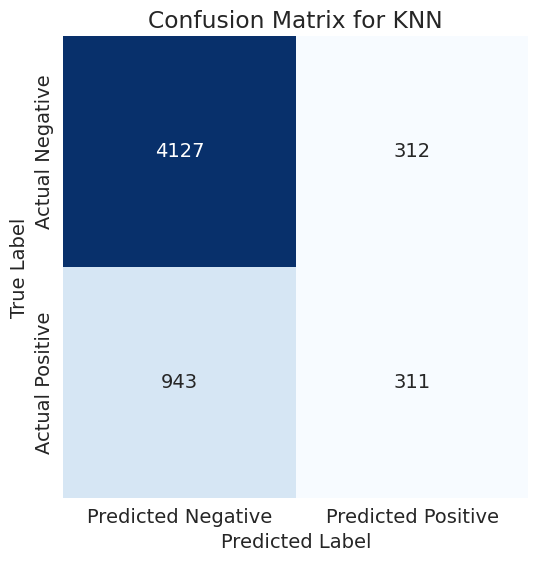

Name of the Algorithm:  LR
Accuracy -  0.8628
Precision -  0.7697
Recall -  0.5383
Specificity -  0.9545
Running time: 0.74 seconds


Confusion Matrix of the Algorithm
 [[4237  202]
 [ 579  675]]


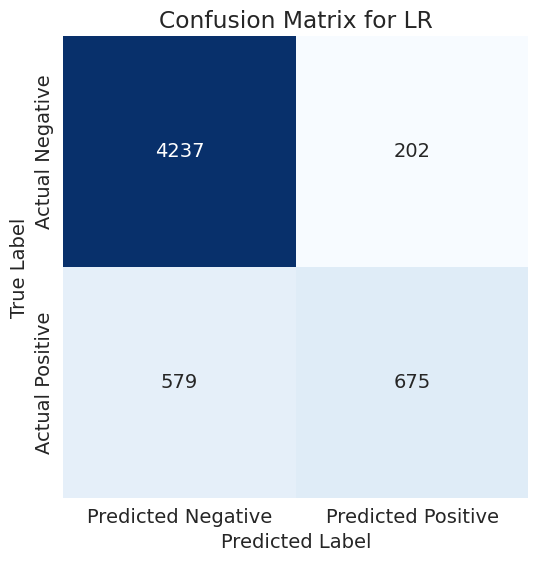

Name of the Algorithm:  DT
Accuracy -  0.8911
Precision -  0.7431
Recall -  0.7727
Specificity -  0.9245
Running time: 0.52 seconds


Confusion Matrix of the Algorithm
 [[4104  335]
 [ 285  969]]


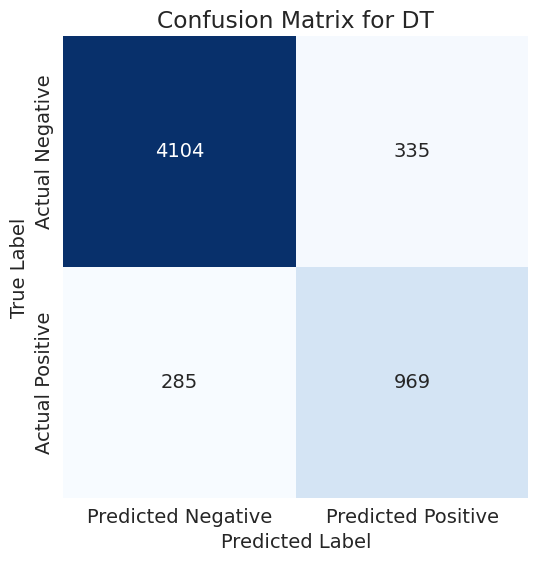

Name of the Algorithm:  RF
Accuracy -  0.9292
Precision -  0.965
Recall -  0.7041
Specificity -  0.9928
Running time: 6.33 seconds


Confusion Matrix of the Algorithm
 [[4407   32]
 [ 371  883]]


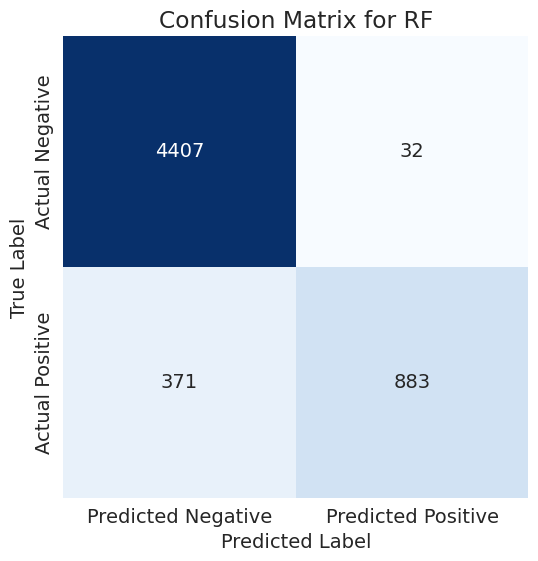

Name of the Algorithm:  GN
Accuracy -  0.8238
Precision -  0.5884
Recall -  0.6659
Specificity -  0.8684
Running time: 0.07 seconds


Confusion Matrix of the Algorithm
 [[3855  584]
 [ 419  835]]


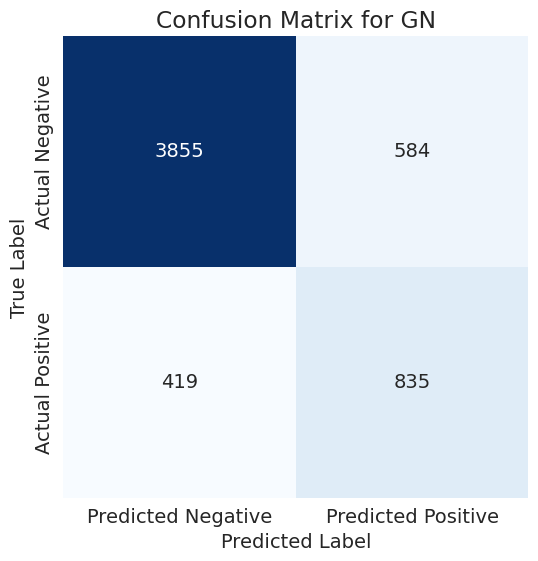

[LightGBM] [Info] Number of positive: 4929, number of negative: 17842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2271
[LightGBM] [Info] Number of data points in the train set: 22771, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216460 -> initscore=-1.286419
[LightGBM] [Info] Start training from score -1.286419
Name of the Algorithm:  LGBM
Accuracy -  0.9368
Precision -  0.9786
Recall -  0.7289
Specificity -  0.9955
Running time: 0.57 seconds


Confusion Matrix of the Algorithm
 [[4419   20]
 [ 340  914]]


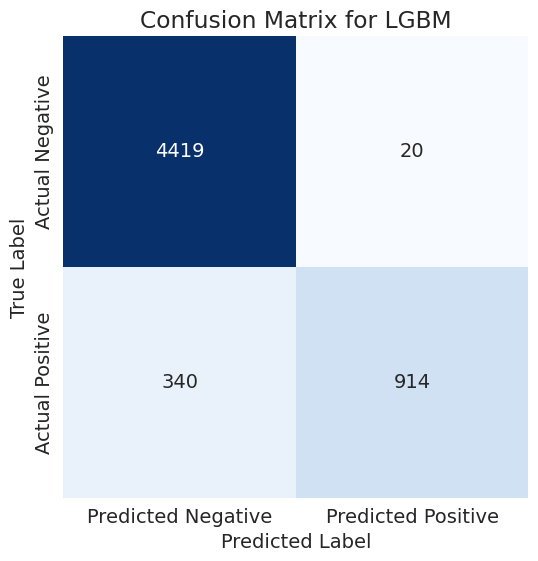

Name of the Algorithm:  SVM
Accuracy -  0.7797
Precision -  0.0
Recall -  0.0
Specificity -  1.0
Running time: 24.08 seconds


Confusion Matrix of the Algorithm
 [[4439    0]
 [1254    0]]


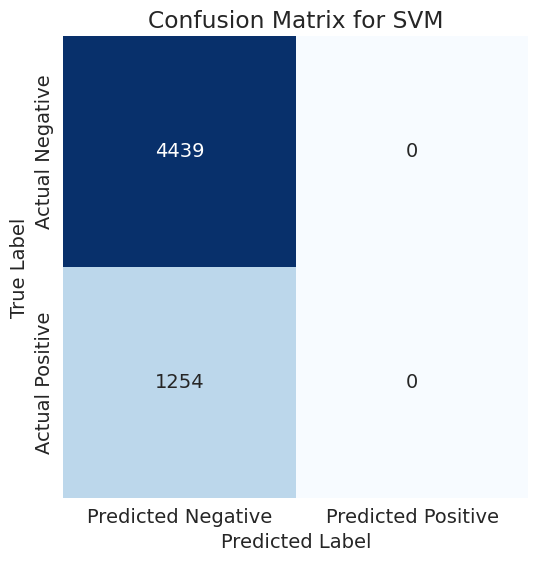

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming clf is a dictionary with classifiers
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []
models =[]
timing = []

for name, clf in clf.items():

    current_accuracy, current_precision, current_recall, current_specificity, elapsed_time, confusion = train_classifier(clf, X_new, y_train, X_new_test, y_test)

    print("================================")
    print("Name of the Algorithm: ", name)
    print("Accuracy - ", current_accuracy.round(4))
    print("Precision - ", current_precision.round(4))
    print("Recall - ", current_recall.round(4))
    print("Specificity - ", current_specificity.round(4))
    print(f"Running time: {elapsed_time:.2f} seconds\n")

    # Confusion Matrix
    print("\nConfusion Matrix of the Algorithm\n", confusion)

    # Store the scores
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)
    timing.append(elapsed_time)

    # Plot the confusion matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()




It seems like you're encountering a problem with the Support Vector Machine (SVM) model where the precision and recall are both zero, while the specificity is 1.0. This typically indicates that the model is predicting only one class (probably the non-default class) for all instances, leading to these metrics.

# Hyperparameter Tuning for Each Algorithm

In [214]:
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings
import logging
import lightgbm as lgb

# Set the logger level for LightGBM to CRITICAL to suppress lesser messages
logging.getLogger('lightgbm').setLevel(logging.CRITICAL)

**Let's tune SVM :**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC

# Define the SVM model
svc = SVC()

# Define a smaller parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter
    'gamma': ['scale', 0.01],        # Kernel coefficient
    'kernel': ['linear', 'rbf'],     # Kernel type
}

# Set up the cross-validation scheme with fewer folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV for faster hyperparameter tuning
randomized_search = RandomizedSearchCV(estimator=svc, param_distributions=param_grid,
                                       n_iter=10, scoring='recall', cv=cv, verbose=1, n_jobs=-1)

# Fit the model to find the best hyperparameters
randomized_search.fit(X_new, y_train)

# Print out the best parameters and the corresponding score
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best Recall Score: {randomized_search.best_score_}")

# Use the best model from RandomizedSearchCV to make predictions
best_svc = randomized_search.best_estimator_

# Evaluate on the test set
y_pred = best_svc.predict(X_new_test)

# Calculate and print the final evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("Final SVM Performance on Test Set:")
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))
print("Recall - ", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Define the k-NN model
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': range(1, 31),         # Number of neighbors to use
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute the nearest neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Set up the cross-validation scheme
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid,
                                       n_iter=20, scoring='recall', cv=cv, verbose=1, n_jobs=-1)

# Fit the model to find the best hyperparameters
randomized_search.fit(X_new, y_train)

# Print out the best parameters and the corresponding score
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best Recall Score: {randomized_search.best_score_}")

# Use the best model from RandomizedSearchCV to make predictions
best_knn = randomized_search.best_estimator_

# Evaluate on the test set
y_pred = best_knn.predict(X_new_test)

# Calculate and print the final evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("Final k-NN Performance on Test Set:")
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))
print("Recall - ", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [75]:
# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective': 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree

    scores = cross_val_score(LGBMClassifier(random_state=12, force_row_wise=True, **params_lgbm),
                             X_new, y_train, scoring='recall', cv=10).mean()
    return scores

# Set parameters distribution
params_lgbm ={
    'num_leaves':(0.5,0.9),           #Controls the number of leaves in each tree.
    'max_depth': (3, 15),             #Maximum depth of each tree.
    'learning_rate': (0.005, 0.3),    #Step size shrinkage used to prevent overfitting
    'min_child_weight':(1e-6, 1e-1),  #Minimum sum of instance weight (hessian) needed in a child.
    'subsample':(0.5, 1),             #Subsample ratio of the training instances.
    'colsample_bytree':(0.5, 1)       #Subsample ratio of columns when constructing each tree.
}


# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [76]:
# Best hyperparameters after tuning:
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm


{'colsample_bytree': 1.0,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 1e-06,
 'num_leaves': 58,
 'subsample': 0.5}

# Training the Model Again

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this ==============

verbose=2 will just mention the number of epoch like this: epoch 1/20



In [77]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier

# Define classifiers
#svc = SVC(probability=True)  # Set probability=True for soft voting
#mnb = MultinomialNB()
gn = GaussianNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
lgb = lgb.LGBMClassifier()
svc = SVC(probability=True) # Set probability=True for soft voting

# Create the VotingClassifier with the chosen classifiers
ensemble = VotingClassifier(
    estimators=[
        ('gn', gn),
        ('dt', dtc),
        ('lr', lrc),
        ('rf', rfc),
        ('knn', knc),
        ('lgb', lgb),
        ('svc', svc)
    ],
    voting='soft',
    verbose=0
)
##        ('mnb', mnb),

current_accuracy, current_precision, current_recall, current_specificity,elapsed_time = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)



print("For ensemble")
print("Accuracy - ", current_accuracy)
print("Precision - ", current_precision)
print("Recall - ", current_recall)
print("Specificity - ", current_specificity)
print("Running Time - ", elapsed_time)


[LightGBM] [Info] Number of positive: 4931, number of negative: 17864
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2274
[LightGBM] [Info] Number of data points in the train set: 22795, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216319 -> initscore=-1.287246
[LightGBM] [Info] Start training from score -1.287246
For ensemble
Accuracy -  0.924899105106159
Precision -  0.9683257918552036
Recall -  0.6815286624203821
Specificity -  0.9936979518343462
Running Time -  207.14073705673218
